### check spatial variation of lake surface height. 


In [ ]:
import numpy as np
import xarray as xr
import geopandas as gpd
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [11]:
path_chaohu_vec = 'data/chaohu-lake/hydrolake_chaohu.gpkg'
path_chaohu_spavar = 'data/chaohu-lake/swot-pixc/raster_height_spavar.nc'
path_dianchi_vec = 'data/dianchi-lake/hydrolake_dianchi_edit.gpkg'
path_dianchi_spavar = 'data/dianchi-lake/swot-pixc/raster_height_spavar.nc'
path_gyaring_vec = 'data/gyaring-lake/hydrolake_gyaring.gpkg'
path_gyaring_spavar = 'data/gyaring-lake/swot-pixc/raster_height_spavar.nc'
path_hulun_vec = 'data/hulun-lake/hydrolake_hulun.gpkg'
path_hulun_spavar = 'data/hulun-lake/swot-pixc/raster_height_spavar.nc'
path_siling_vec = 'data/siling_co-lake/hydrolake_siling_co.gpkg'
path_siling_spavar = 'data/siling_co-lake/swot-pixc/raster_height_spavar.nc'


In [12]:
## 1. read vector file of the lake.
chaohu_gdf = gpd.read_file(path_chaohu_vec)
dianchi_gdf = gpd.read_file(path_dianchi_vec)
gyaring_gdf = gpd.read_file(path_gyaring_vec)
hulun_gdf = gpd.read_file(path_hulun_vec)
siling_gdf = gpd.read_file(path_siling_vec)
## 2. read spavar data
spavar_chaohu_xr = xr.open_dataset(path_chaohu_spavar)
spavar_dianchi_xr = xr.open_dataset(path_dianchi_spavar)
spavar_gyaring_xr = xr.open_dataset(path_gyaring_spavar)
spavar_hulun_xr = xr.open_dataset(path_hulun_spavar)
spavar_siling_xr = xr.open_dataset(path_siling_spavar)


In [13]:
xmin, ymin, xmax, ymax = chaohu_gdf.geometry[0].buffer(0.01).bounds
chaohu_extent = (xmin, xmax, ymin, ymax)
xmin, ymin, xmax, ymax = dianchi_gdf.geometry[0].buffer(0.01).bounds
dianchi_extent = (xmin, xmax, ymin, ymax)
xmin, ymin, xmax, ymax = gyaring_gdf.geometry[0].buffer(0.01).bounds
gyaring_extent = (xmin, xmax, ymin, ymax)
xmin, ymin, xmax, ymax = hulun_gdf.geometry[0].buffer(0.01).bounds
hulun_extent = (xmin, xmax, ymin, ymax)
xmin, ymin, xmax, ymax = siling_gdf.geometry[0].buffer(0.01).bounds
siling_extent = (xmin, xmax, ymin, ymax)


In [14]:
spavar_chaohu_xr


<xarray.Dataset> Size: 64kB
Dimensions:             (x: 111, y: 70)
Coordinates:
  * x                   (x) float64 888B 117.3 117.3 117.3 ... 117.9 117.9 117.9
  * y                   (y) float64 560B 31.73 31.73 31.72 ... 31.43 31.42 31.42
Data variables:
    ht_spavar_smoothed  (y, x) float64 62kB ...

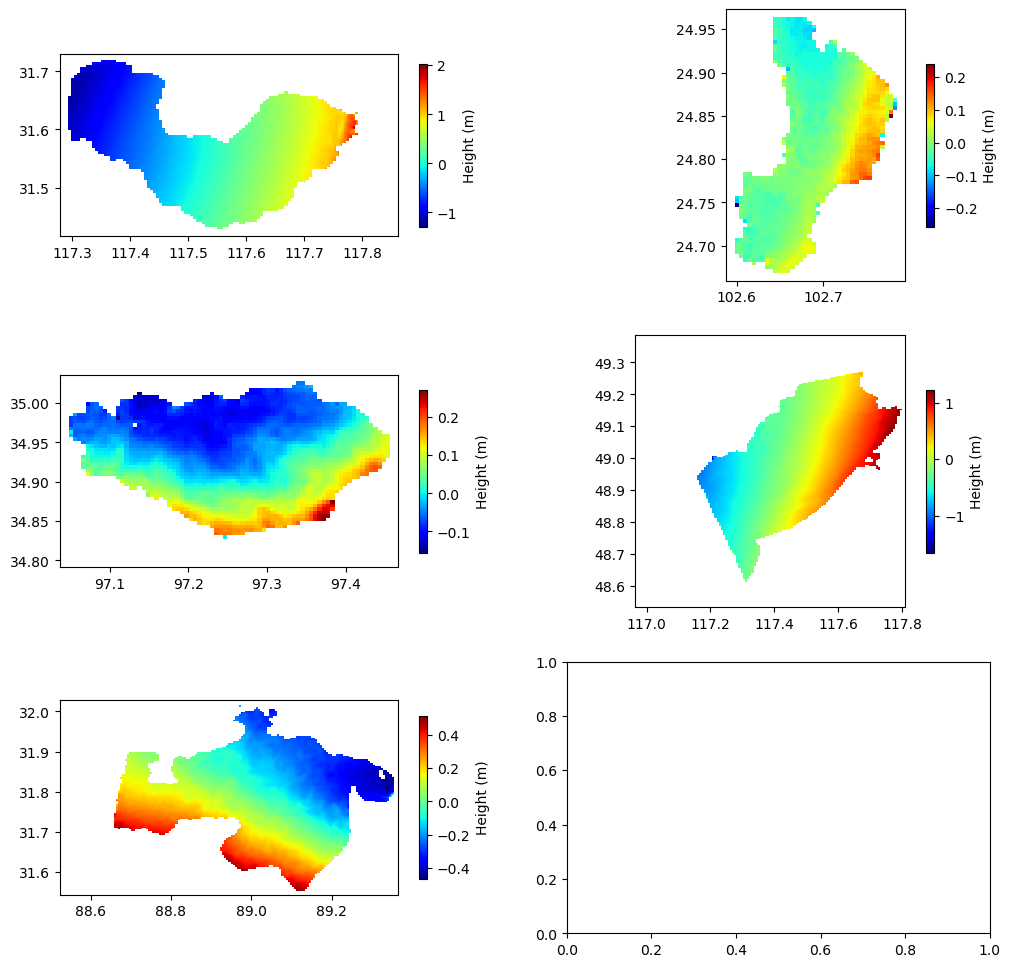

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
spavar_xr_list = [spavar_chaohu_xr, spavar_dianchi_xr, 
                    spavar_gyaring_xr, spavar_hulun_xr, spavar_siling_xr]
extent_list = [chaohu_extent, dianchi_extent, 
                    gyaring_extent, hulun_extent, siling_extent]

for i, (spavar_xr, extent) in enumerate(zip(spavar_xr_list, extent_list)):
    im = ax[i // 2, i % 2].imshow(spavar_xr['ht_spavar_smoothed'].values, cmap='jet', extent=extent)
    plt.colorbar(im, ax=ax[i // 2, i % 2], label='Height (m)', shrink=0.6)




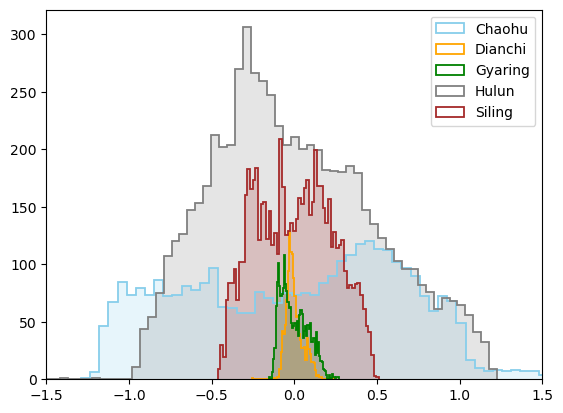

In [54]:
for spavar_xr, color, label in zip([spavar_chaohu_xr, spavar_dianchi_xr, spavar_gyaring_xr, spavar_hulun_xr, spavar_siling_xr], 
                                    ['skyblue', 'orange', 'green', 'grey', 'brown'], 
                                    ['Chaohu', 'Dianchi', 'Gyaring', 'Hulun', 'Siling']):
    plt.hist(spavar_xr['ht_spavar_smoothed'].values.flatten(), 
             bins=60, alpha=0.2, color=color);
    plt.hist(spavar_xr['ht_spavar_smoothed'].values.flatten(), 
             bins=60, histtype='step', linewidth=1.3, color=color, label=label);
plt.xlim(-1.5, 1.5)
plt.legend();


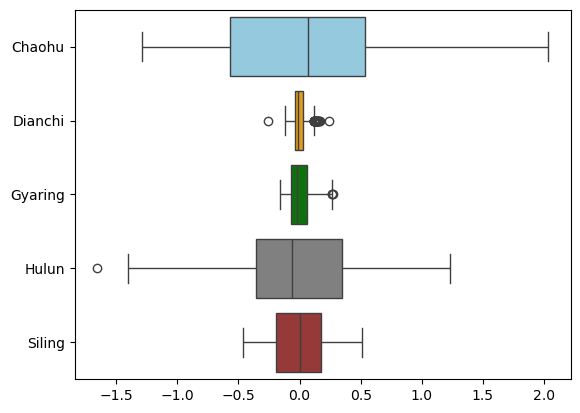

In [55]:
a = pd.DataFrame(spavar_chaohu_xr['ht_spavar_smoothed'].values.flatten(), columns=['Chaohu'])
b = pd.DataFrame(spavar_dianchi_xr['ht_spavar_smoothed'].values.flatten(), columns=['Dianchi'])
c = pd.DataFrame(spavar_gyaring_xr['ht_spavar_smoothed'].values.flatten(), columns=['Gyaring'])
d = pd.DataFrame(spavar_hulun_xr['ht_spavar_smoothed'].values.flatten(), columns=['Hulun'])
e = pd.DataFrame(spavar_siling_xr['ht_spavar_smoothed'].values.flatten(), columns=['Siling'])
ax = sns.boxplot(data=a, color='skyblue', orient='h');
ax = sns.boxplot(data=b, color='orange', orient='h');
ax = sns.boxplot(data=c, color='green', orient='h');
ax = sns.boxplot(data=d, color='grey', orient='h');
ax = sns.boxplot(data=e, color='brown', orient='h');
# ax.axvline(x=0, color='black', linestyle='--');


In [56]:
chaohu_spavar_mean = np.nanmean(spavar_chaohu_xr['ht_spavar_smoothed'].values.flatten())
dianchi_spavar_mean = np.nanmean(spavar_dianchi_xr['ht_spavar_smoothed'].values.flatten())
gyaring_spavar_mean = np.nanmean(spavar_gyaring_xr['ht_spavar_smoothed'].values.flatten())
print(f'Chaohu spavar mean: {chaohu_spavar_mean:.4f} m')
print(f'Dianchi spavar mean: {dianchi_spavar_mean:.4f} m')
print(f'Gyaring spavar mean: {gyaring_spavar_mean:.4f} m')


Chaohu spavar mean: 0.0000 m
Dianchi spavar mean: 0.0000 m
Gyaring spavar mean: -0.0000 m


In [57]:
chaohu_spavar_var = np.nanstd(spavar_chaohu_xr['ht_spavar_smoothed'].values.flatten())
dianchi_spavar_var = np.nanstd(spavar_dianchi_xr['ht_spavar_smoothed'].values.flatten())
gyaring_spavar_var = np.nanstd(spavar_gyaring_xr['ht_spavar_smoothed'].values.flatten())
print(f'Chaohu spavar std: {chaohu_spavar_var:.4f} m')
print(f'Dianchi spavar std: {dianchi_spavar_var:.4f} m')
print(f'Gyaring spavar std: {gyaring_spavar_var:.4f} m')



Chaohu spavar std: 0.6497 m
Dianchi spavar std: 0.0511 m
Gyaring spavar std: 0.0835 m
